# CO2 Emission Time Series Analysis

In [1]:
#Import pandas as pd and Numpy as np.

import pandas as pd
import numpy as np

In [2]:
# Load in the CO2 emission data from the folder using pandas read_csv.

co2_levels = pd.read_csv('co2_weekly_mlo.csv')

In [3]:
# Display the first 5 rows of the dataset. 
co2_levels.head()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3781,333.37,5,-999.99,-999.99,50.39
1,1974,5,26,1974.3973,332.95,6,-999.99,-999.99,50.05
2,1974,6,2,1974.4164,332.35,5,-999.99,-999.99,49.59
3,1974,6,9,1974.4356,332.20,7,-999.99,-999.99,49.64
4,1974,6,16,1974.4548,332.37,7,-999.99,-999.99,50.06


In [4]:
# Inspect the data type in the dataset. The main variable of interest is "average", which is the average daily CO2 emission for
# the weeks. The data type for the variable is float64 and to work with pandas package time series commands, the index data has to be
# time stamp64. 
co2_levels.dtypes

year                     int64
month                    int64
day                      int64
decimal                float64
average                float64
ndays                    int64
1 year ago             float64
10 years ago           float64
increase since 1800    float64
dtype: object

In [5]:
# I combine the year, month and day variable into a single date variable string.

co2_levels["Date"] = co2_levels['year'].astype(str) + '-' + co2_levels['month'].astype(str) + '-' + co2_levels['day'].astype(str)

In [6]:
# I use the to_datetime function to convert string date to time stamp.

co2_levels['Date'] = pd.to_datetime(co2_levels['Date'])
co2_levels = co2_levels[["Date", "average"]]
co2_levels.dtypes

Date       datetime64[ns]
average           float64
dtype: object

In [7]:
co2_levels.head()

,Date,average
0,1974-05-19,333.37
1,1974-05-26,332.95
2,1974-06-02,332.35
3,1974-06-09,332.20
4,1974-06-16,332.37


In [8]:
co2_levels.head()

,Date,average
0,1974-05-19,333.37
1,1974-05-26,332.95
2,1974-06-02,332.35
3,1974-06-09,332.20
4,1974-06-16,332.37


In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

co2_levels['average'].describe()

count    2527.000000
mean      359.941342
std       118.006843
min      -999.990000
25%       347.660000
50%       366.380000
75%       390.340000
max       421.630000
Name: average, dtype: float64

In [10]:
co2_levels[co2_levels['average']==-999.99]

,Date,average
72,1975-10-05,-999.99
81,1975-12-07,-999.99
82,1975-12-14,-999.99
83,1975-12-21,-999.99
84,1975-12-28,-999.99
110,1976-06-27,-999.99
409,1982-03-21,-999.99
412,1982-04-11,-999.99
413,1982-04-18,-999.99
481,1983-08-07,-999.99


In [11]:
co2_levels['average'][co2_levels['average']==-999.99] = np.NaN

In [12]:
co2_levels["average"].isnull().sum()

18

In [13]:
co2_levels[co2_levels["average"].isnull()].head()

,Date,average
72,1975-10-05,NaN
81,1975-12-07,NaN
82,1975-12-14,NaN
83,1975-12-21,NaN
84,1975-12-28,NaN


In [14]:
co2_levels["average"] = co2_levels["average"].fillna(method = 'ffill')

In [15]:
co2_levels = co2_levels[["Date", "average"]]

In [16]:
co2_levels = co2_levels.set_index("Date")

In [17]:
co2_levels.head()

,average
Date,
1974-05-19,333.37
1974-05-26,332.95
1974-06-02,332.35
1974-06-09,332.20
1974-06-16,332.37


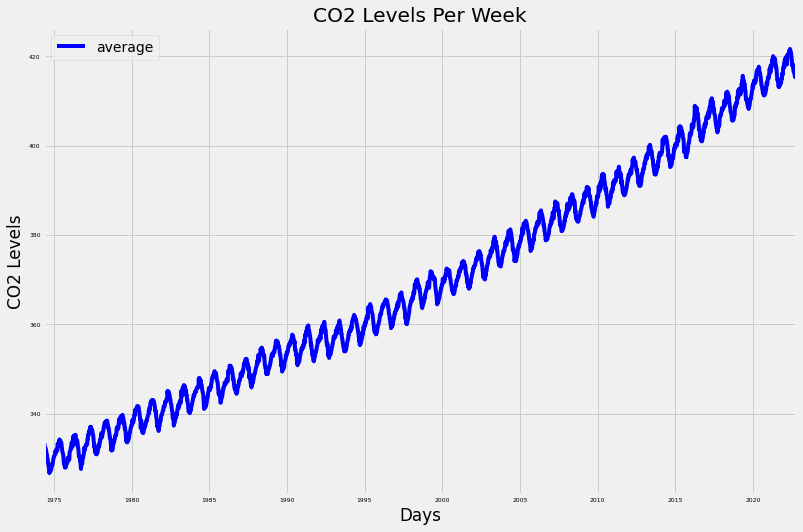

In [18]:
ax = co2_levels.plot(color = 'blue', fontsize = 6, figsize = (12, 8))
ax.set_xlabel("Days")
ax.set_ylabel("CO2 Levels")
ax.set_title("CO2 Levels Per Week")
plt.show()

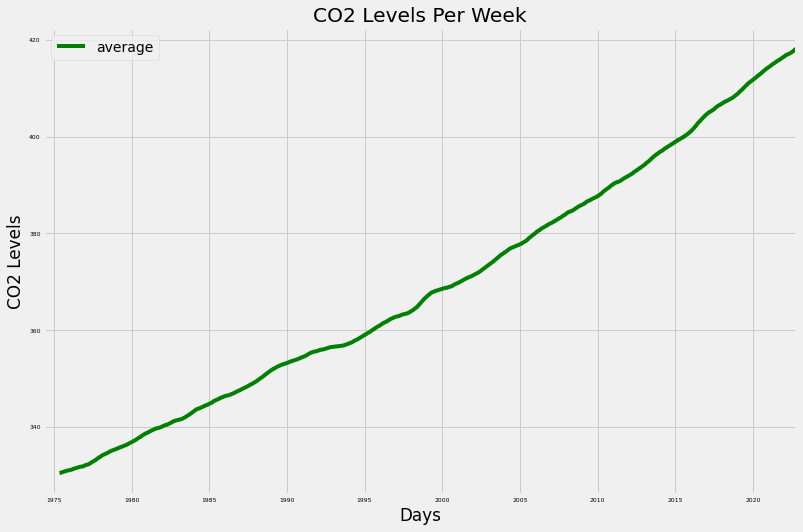

In [19]:
co2_levels_mean = co2_levels.rolling(window = 52).mean()

ax = co2_levels_mean.plot(color = 'green', fontsize = 6, figsize = (12, 8))
ax.set_xlabel("Days")
ax.set_ylabel("CO2 Levels")
ax.set_title("CO2 Levels Per Week")
plt.show()

Text(0.5, 1.0, 'The Average Monthly CO2 Emmission')

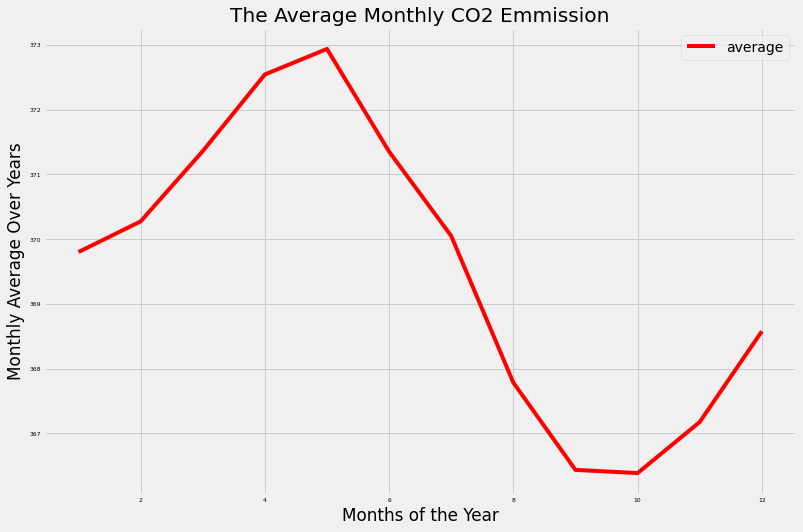

In [20]:

index_month = co2_levels.index.month
co2_level_month = co2_levels.groupby(index_month).mean()

ax = co2_level_month.plot(color = 'red', figsize = (12, 8), fontsize = 6)
ax.set_xlabel("Months of the Year")
ax.set_ylabel("Monthly Average Over Years")
ax.set_title("The Average Monthly CO2 Emmission")

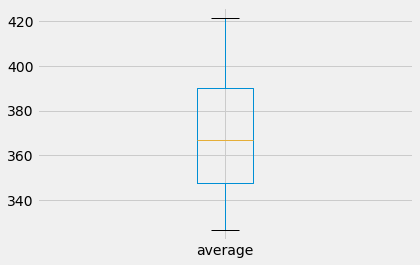

In [21]:
co2_levels.boxplot()
plt.show()

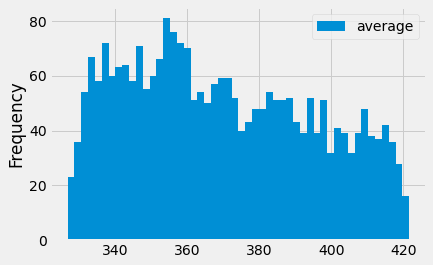

In [22]:
co2_levels.plot(kind = 'hist', bins = 50)
plt.show()

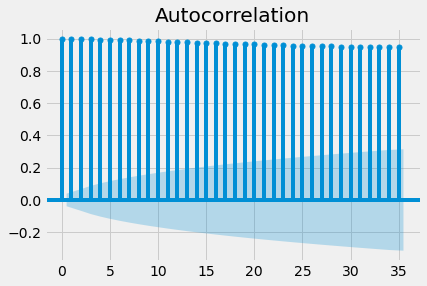

In [23]:
from statsmodels.graphics import tsaplots

ax = tsaplots.plot_acf(co2_levels)

In [24]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(co2_levels)
res[1]

0.9747870428536357

In [68]:
co2_st = co2_levels.diff()
co2_st = co2_st.dropna()

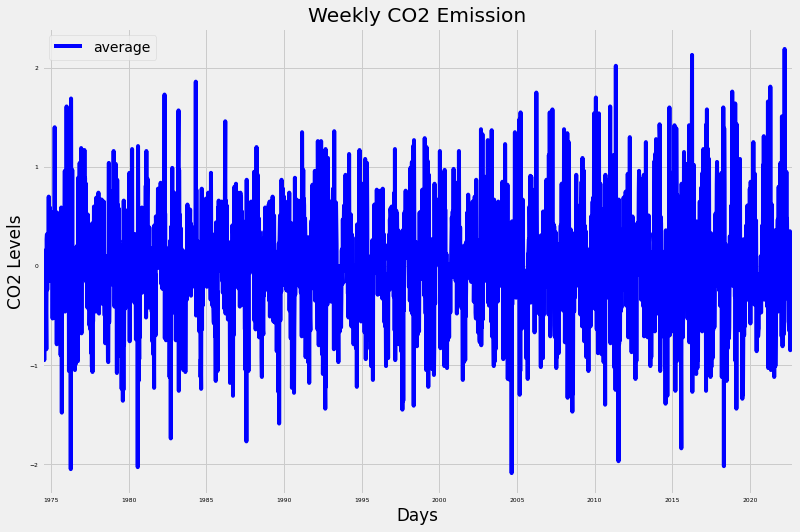

In [69]:
ax = co2_st.plot(color = 'blue', fontsize = 6, figsize = (12, 8))
ax.set_xlabel("Days")
ax.set_ylabel("CO2 Levels")
ax.set_title("Weekly CO2 Emission")
plt.show()

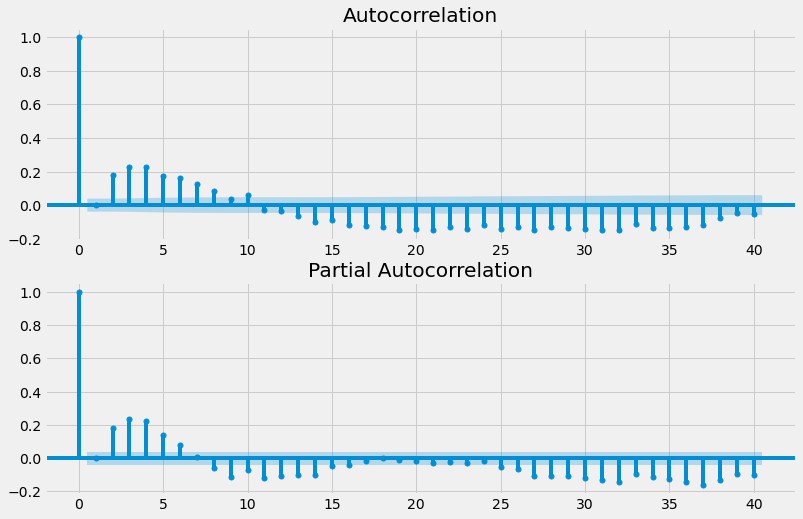

In [70]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(co2_st, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = tsaplots.plot_pacf(co2_st, lags=40, ax=ax2)

In [73]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

bic = []

for p in range(7):
    mod = ARIMA(co2_st, order = (p, 0, 0))
    res = mod.fit()
    bic.append(res.bic)
    

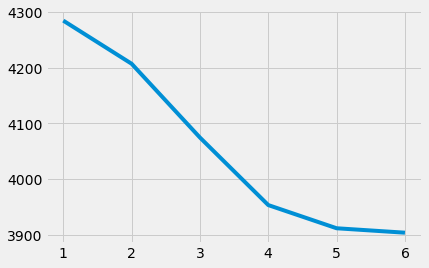

In [74]:
plt.plot(range(1, 7), bic[1:7])